In [2]:
'''
plot limits digitized from paper 1607.01009

''' 

import ROOT as rt
import numpy as np
import sys
sys.path.append('/storage/af/user/christiw/login-1/christiw/DM/SNSPD_GaAs_limit/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph


In [3]:
path = '/storage/af/user/christiw/login-1/christiw/DM/SNSPD_GaAs_limit/data/'

ele_recoil = {}
limits = {}

ele_recoil['Fdmq-2_0p01GeV'] = np.genfromtxt(path + '1607.01009_Fig4_Fdmq-2_GaAs_0p01GeV.csv', delimiter = ',')
ele_recoil['Fdmq-2_1GeV'] = np.genfromtxt(path + '1607.01009_Fig4_Fdmq-2_GaAs_1GeV.csv', delimiter = ',')
ele_recoil['Fdm1_0p01GeV'] = np.genfromtxt(path + '1607.01009_Fig4_Fdm1_GaAs_0p01GeV.csv', delimiter = ',')
ele_recoil['Fdm1_1GeV'] = np.genfromtxt(path + '1607.01009_Fig4_Fdm1_GaAs_1GeV.csv', delimiter = ',')


limits['Fdmq-2_1ph'] = np.genfromtxt(path + '1607.01009_Fig2_limit_Fdmq-2_GaAs_1ph.csv', delimiter = ',')
limits['Fdm1_1ph'] = np.genfromtxt(path + '1607.01009_Fig2_limit_Fdm1_GaAs_1ph.csv', delimiter = ',')
limits['Fdmq-2_2ph'] = np.genfromtxt(path + '1607.01009_Fig2_limit_Fdmq-2_GaAs_2ph.csv', delimiter = ',')
limits['Fdm1_2ph'] = np.genfromtxt(path + '1607.01009_Fig2_limit_Fdm1_GaAs_2ph.csv', delimiter = ',')

limits['Fdmq-2_XENON'] = np.genfromtxt(path + '1607.01009_Fig2_limit_Fdmq-2_XENON10_1kg-year.csv', delimiter = ',')
limits['Fdm1_XENON'] = np.genfromtxt(path + '1607.01009_Fig2_limit_Fdm1_XENON10_1kg-year.csv', delimiter = ',')


# limits

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


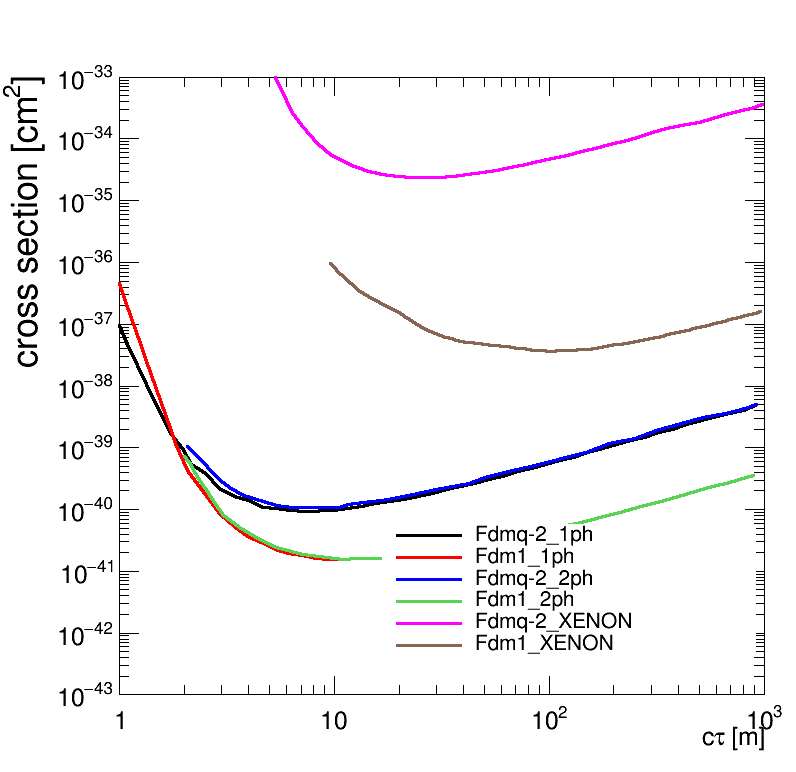

In [11]:

leg = rt.TLegend(0.48,0.15,0.95,0.32)
leg2 = rt.TLegend(0.18,0.17,0.40,0.30)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
leg2.SetTextSize(0.032)
leg2.SetBorderSize(0)
leg2.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 800, 800)
c.SetRightMargin(0.04)

rt.gStyle.SetOptFit(1011)
h = {}
h_exp1sig = {}
h_exp2sig = {}
h_obs = {}
h_others = {}
sample_temp = []

for i, m in enumerate(limits.keys()):


    h[m] = create_TGraph(limits[m][:,0], limits[m][:,1],  axis_title=['c#tau [m]', 'cross section [cm^{2}]'])
    leg.AddEntry(h[m],m, "L")

    h[m].SetLineColor(std_color_list[i])
    h[m].SetMarkerColor(std_color_list[i])
    h[m].SetLineWidth(3)
    h[m].SetLineStyle(1)
    h[m].GetXaxis().SetLimits(1,1000.0)
    h[m].GetYaxis().SetRangeUser(1e-43,1e-33)

    h[m].GetXaxis().SetTitleOffset(1)
    h[m].GetYaxis().SetTitleSize(0.05)
    h[m].GetYaxis().SetTitleOffset(1.5)
    h[m].SetTitle('')


for i,m in enumerate(h.keys()):
    h[m].Draw('LA' if i == 0 else 'Lsame')





leg.Draw()
c.SetLogy()
c.SetLogx()
c.SetTicky(1)
c.SetTickx(1)
c.SetLeftMargin(0.15)
c.Draw()
